## Dendrograms - demo

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist, squareform

plt.rcParams['figure.figsize'] = [9, 5]
sns.set_theme()

### Denrograms - iris subset

In [2]:
# Load iris dataset
iris = load_iris()

# Format iris dataset as dataframe
iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)

# Load iris labels
iris_df['label'] = iris['target_names'][iris['target']]

# Keep only petal length and petal width
iris_df_sub = iris_df.filter(
    items=[
        'petal length (cm)', 
        'petal width (cm)', 
        'label'
    ]
)

# Subset dataset to two columns for easier 
# visual inspection
numer_cols = ['petal length (cm)', 'petal width (cm)']

# Drop duplicates that have appeared
# due to removing columns
iris_df_sub = iris_df_sub.drop_duplicates().reset_index(drop=True)

# Reduce dataset for easier dendrogram preview
iris_df_sub = iris_df.groupby('label').sample(3, random_state=44).reset_index(drop=True)

Text(0.5, 1.0, 'Iris subset')

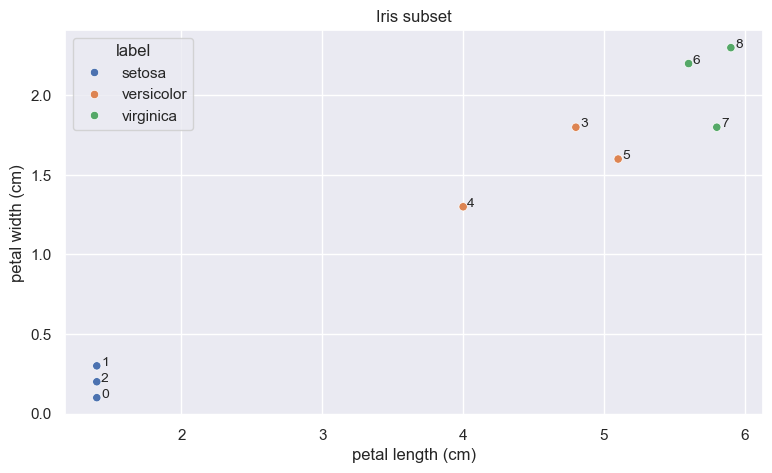

In [9]:
# Plot 'petal length (cm)' and 'petal width (cm)' with
# cluster info and point idx
sns.scatterplot(iris_df_sub, x='petal length (cm)', y='petal width (cm)',hue='label')
for idx in iris_df_sub.index:
    plt.text(
        x=iris_df_sub.loc[idx,'petal length (cm)']+0.03, 
        y=iris_df_sub.loc[idx,'petal width (cm)'], 
        s=str(idx), 
        size='small'
    )

plt.title('Iris subset')

In [ ]:
linkage_matrix = linkage(iris_df_sub[numer_cols], method='ward')
linkage_matrix

# Groupe 1 | Groupe 2 | Distance | Size
# 1 | 2 | 0.5 | 150
# 1 | 3 | 1.0 | 100
# 2 | 3 | 1.5 | 50

array([[ 1.        ,  2.        ,  0.1       ,  2.        ],
       [ 0.        ,  9.        ,  0.17320508,  3.        ],
       [ 6.        ,  8.        ,  0.31622777,  2.        ],
       [ 3.        ,  5.        ,  0.36055513,  2.        ],
       [ 7.        , 11.        ,  0.5228129 ,  3.        ],
       [ 4.        , 12.        ,  1.19023807,  3.        ],
       [13.        , 14.        ,  2.16948535,  6.        ],
       [10.        , 15.        ,  8.2723099 ,  9.        ]])

In [10]:
linkage_df = pd.DataFrame(linkage_matrix, columns=['First group', 'Second group', 'Distance', 'Size'])
linkage_df['New id'] = np.arange(linkage_df.shape[0]) + linkage_df.shape[0]+1

linkage_df

,First group,Second group,Distance,Size,New id
0,1.0,2.0,0.100000,2.0,9
1,0.0,9.0,0.173205,3.0,10
2,6.0,8.0,0.316228,2.0,11
3,3.0,5.0,0.360555,2.0,12
4,7.0,11.0,0.522813,3.0,13
5,4.0,12.0,1.190238,3.0,14
6,13.0,14.0,2.169485,6.0,15
7,10.0,15.0,8.272310,9.0,16


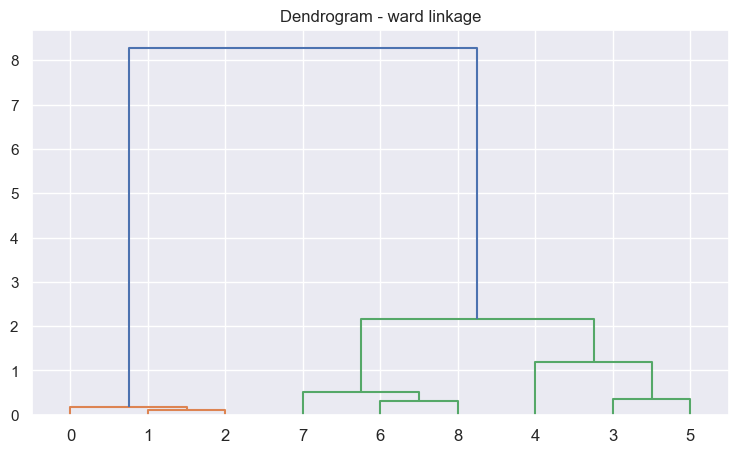

In [11]:
plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - ward linkage')
plt.show()

In [ ]:
cophenet(linkage_matrix, pdist(iris_df_sub[numer_cols].to_numpy()))[0]

# pdist(...)
# Computes the pairwise (Euclidean by default) distances between the data points.
# Output: a condensed distance matrix (1D array of all pairwise distances).

# cophenet(...)
# Computes the cophenetic correlation coefficient between a linkage matrix and a distance matrix.
# Output: a tuple containing the cophenetic correlation coefficient [0] and the cophenetic distance matrix [1].

# linkage_matrix
# A linkage matrix returned by the linkage function.



np.float64(0.9451792902977969)

In [15]:
def cophenetic_corr(linkage_matrix, data_mtx, distance_measure='euclidean'):
    
    if distance_measure != 'precomputed':
        cop_corr = cophenet(
            linkage_matrix, 
            pdist(data_mtx, metric=distance_measure),
        )[0]
        
    else:
        cop_corr = cophenet(
            linkage_matrix, 
            squareform(data_mtx), # Convert distance matrix to square form
        )[0]
        
    print(
        'Cophenetic correlation : {}'.format(cop_corr)
    )
    

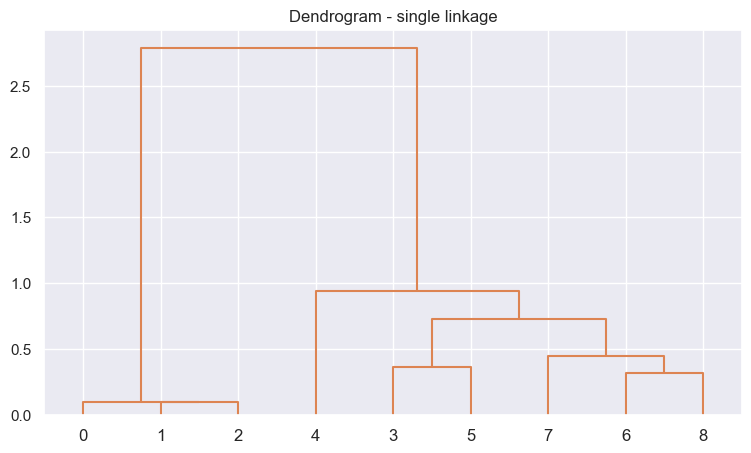

In [16]:
linkage_matrix = linkage(iris_df_sub[numer_cols], method='single')

plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - single linkage')
plt.show()

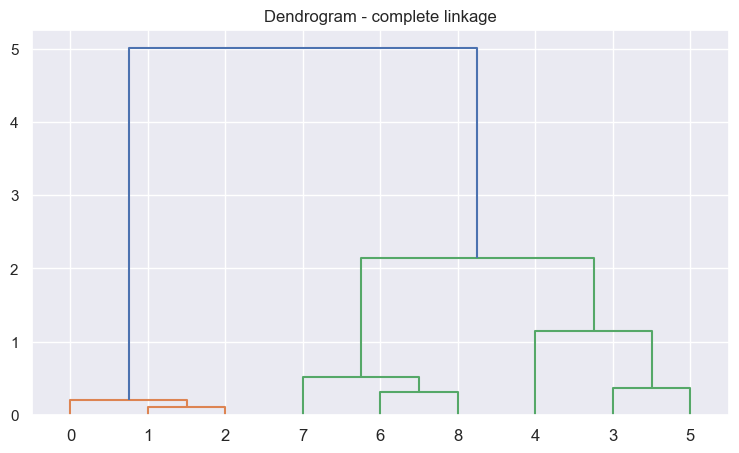

In [17]:
linkage_matrix = linkage(iris_df_sub[numer_cols], method='complete')

plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - complete linkage')
plt.show()

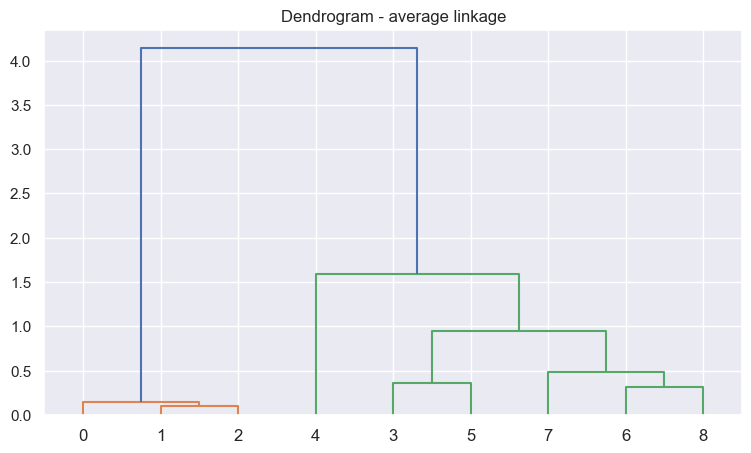

In [18]:
linkage_matrix = linkage(iris_df_sub[numer_cols], method='average')

plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - average linkage')
plt.show()

### Dendrograms - full iris dataset

In [19]:
# Load iris dataset
iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)

numer_cols = iris_df.columns

# Load iris labels
iris_df['label'] = iris['target_names'][iris['target']]

Text(0.5, 1.0, 'Scatterplot with true label')

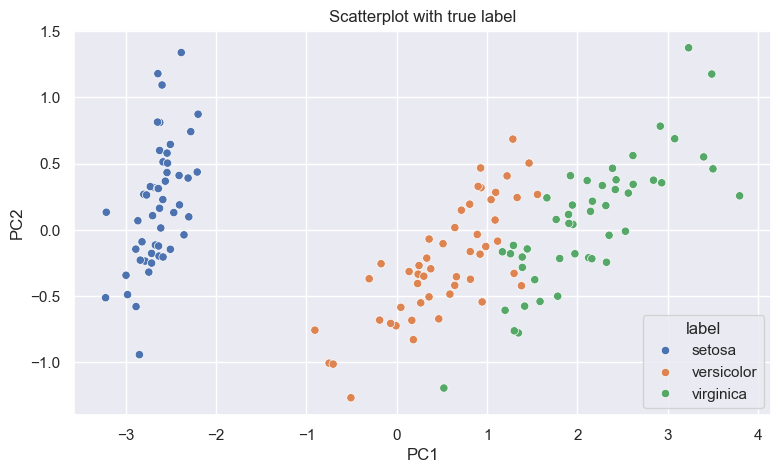

In [20]:
# Run PCA so we can show dataset in 2D space
pca = PCA(n_components=2)
pca_data = pca.fit_transform(iris_df[numer_cols].values)
pca_data = np.column_stack([pca_data, iris_df['label'].values])
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'label'])

# Plot and colour based on reference label
sns.scatterplot(pca_df, x='PC1', y='PC2', hue='label')
plt.title('Scatterplot with true label')

Cophenetic correlation : 0.8638786773076584


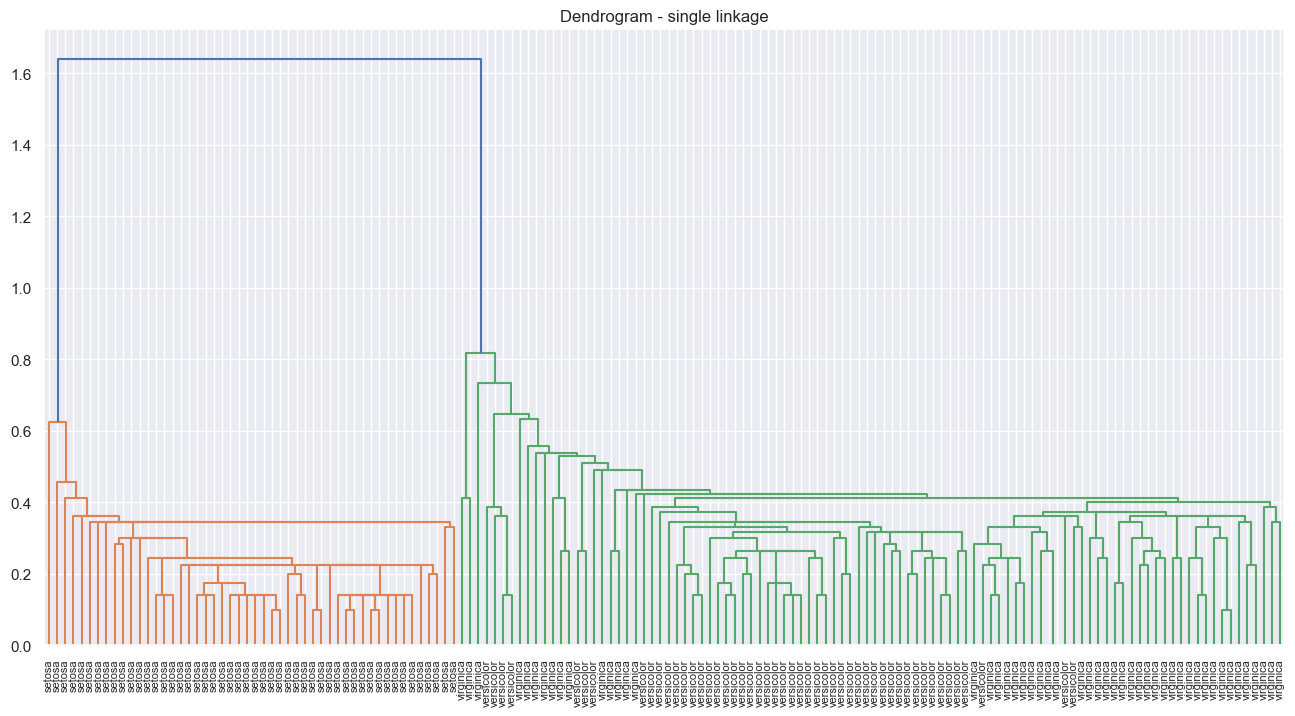

In [21]:
linkage_matrix = linkage(iris_df[numer_cols], method='single')

cophenetic_corr(linkage_matrix, iris_df[numer_cols].to_numpy())

plt.figure(figsize=(16,8))
dendrogram(linkage_matrix, color_threshold=1, labels=iris_df['label'].to_numpy(), leaf_font_size=8)
plt.title('Dendrogram - single linkage')
plt.show()

Above, we see the messy hierarchy caused by the chaining effect

Text(0.5, 1.0, 'Scatterplot with true label')

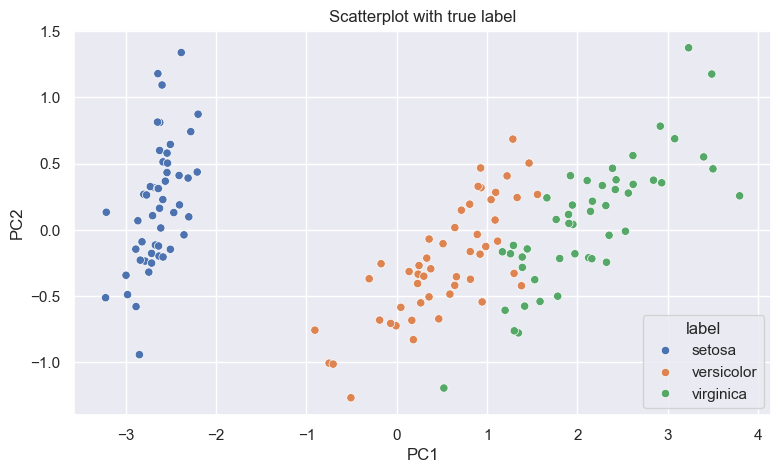

In [22]:
# Plot and colour based on reference label
sns.scatterplot(pca_df, x='PC1', y='PC2', hue='label')
plt.title('Scatterplot with true label')

Cophenetic correlation : 0.7269856836284624


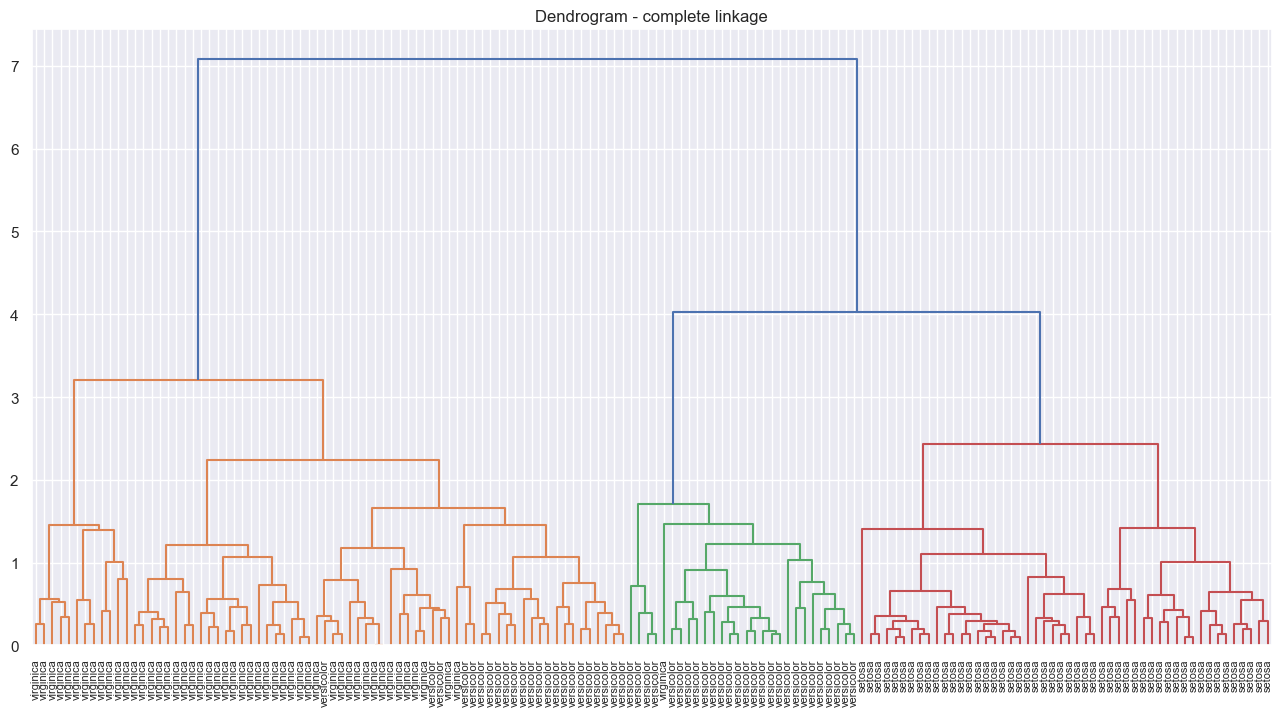

In [23]:
linkage_matrix = linkage(iris_df[numer_cols], method='complete')
cophenetic_corr(linkage_matrix, iris_df[numer_cols].to_numpy())

plt.figure(figsize=(16,8))
dendrogram(linkage_matrix, color_threshold=4, labels=iris_df['label'].to_numpy(), leaf_font_size=8)
plt.title('Dendrogram - complete linkage')
plt.show()

Cophenetic correlation is a bit lower here than Single Method, Setosa and Versicolor are closer to each other compared to the Versicolor and Virginica

But in datas, Setosa is further appart to Versicolor and Virginica

Cophenetic correlation : 0.8769561464741983


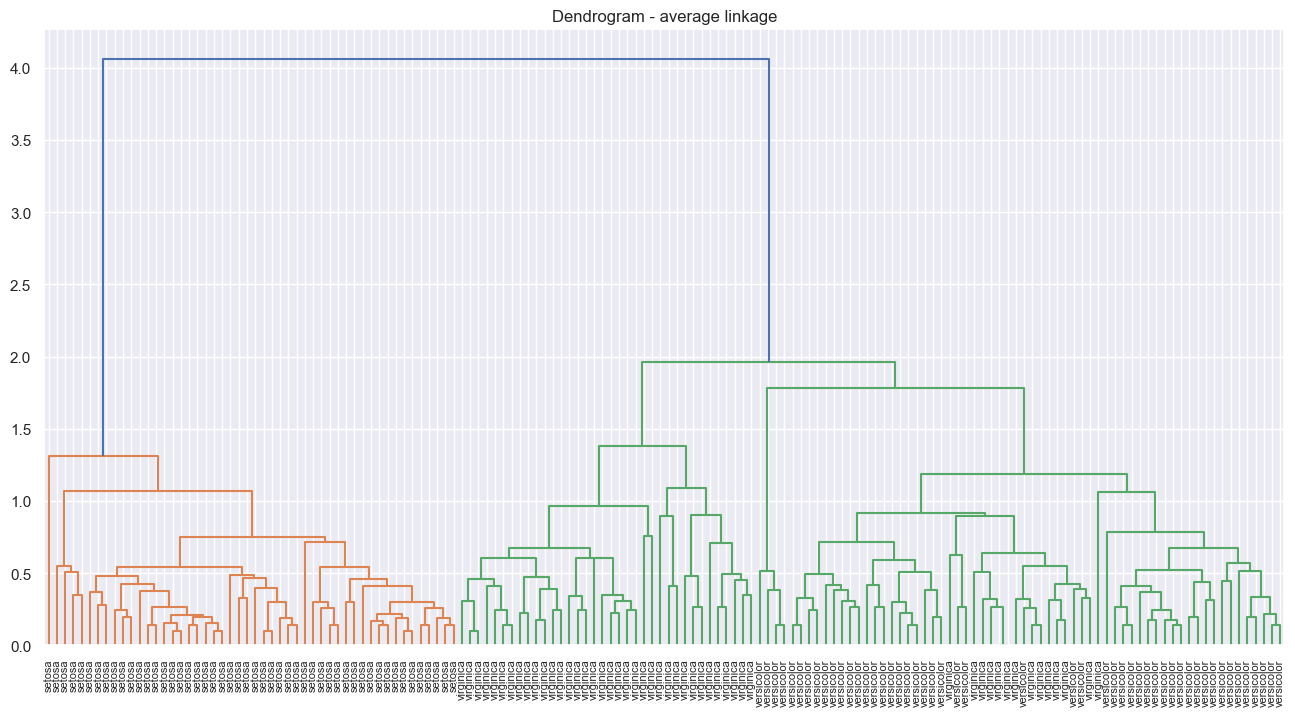

In [24]:
linkage_matrix = linkage(iris_df[numer_cols], method='average')
cophenetic_corr(linkage_matrix, iris_df[numer_cols].to_numpy())

plt.figure(figsize=(16,8))
dendrogram(linkage_matrix, color_threshold=4, labels=iris_df['label'].to_numpy(), leaf_font_size=8)
plt.title('Dendrogram - average linkage')
plt.show()

Cophenetic correlation : 0.8728283153305715


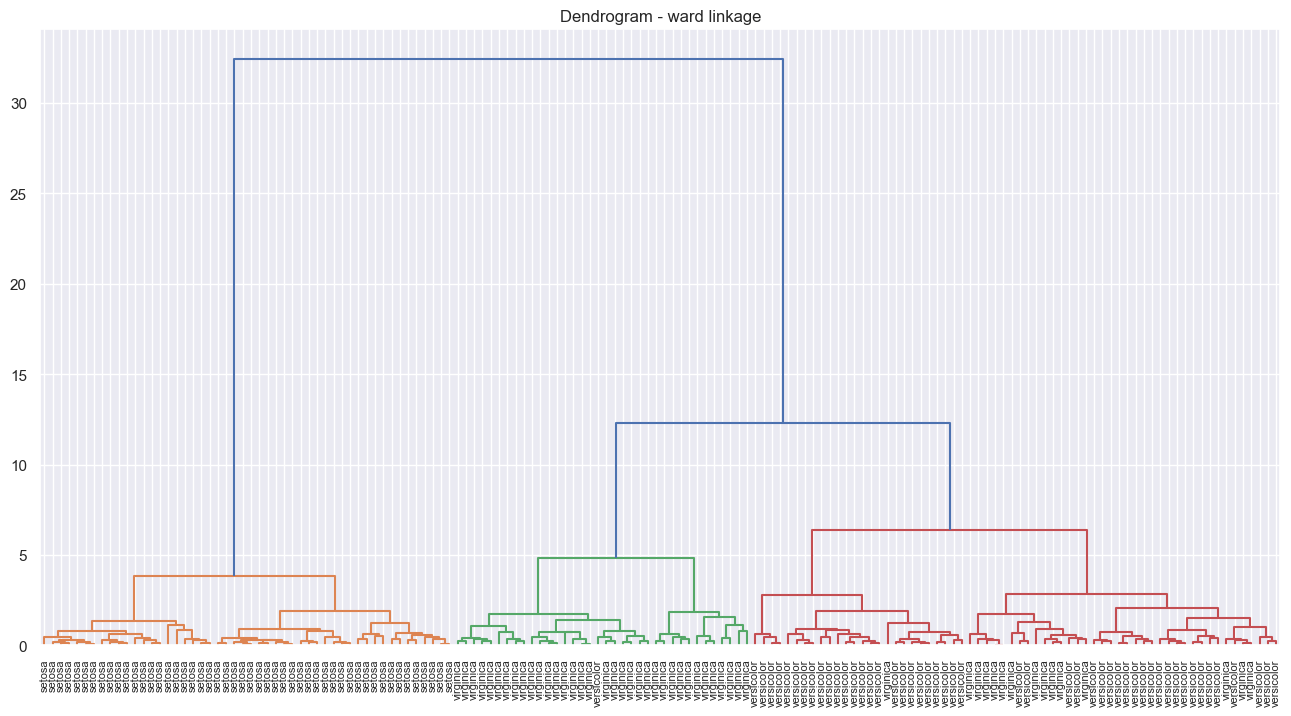

In [25]:
linkage_matrix = linkage(iris_df[numer_cols], method='ward')
cophenetic_corr(linkage_matrix, iris_df[numer_cols].to_numpy())

plt.figure(figsize=(16,8))
dendrogram(linkage_matrix, color_threshold=10, labels=iris_df['label'].to_numpy(), leaf_font_size=8)
plt.title('Dendrogram - ward linkage')
plt.show()

### Dendrogram truncation

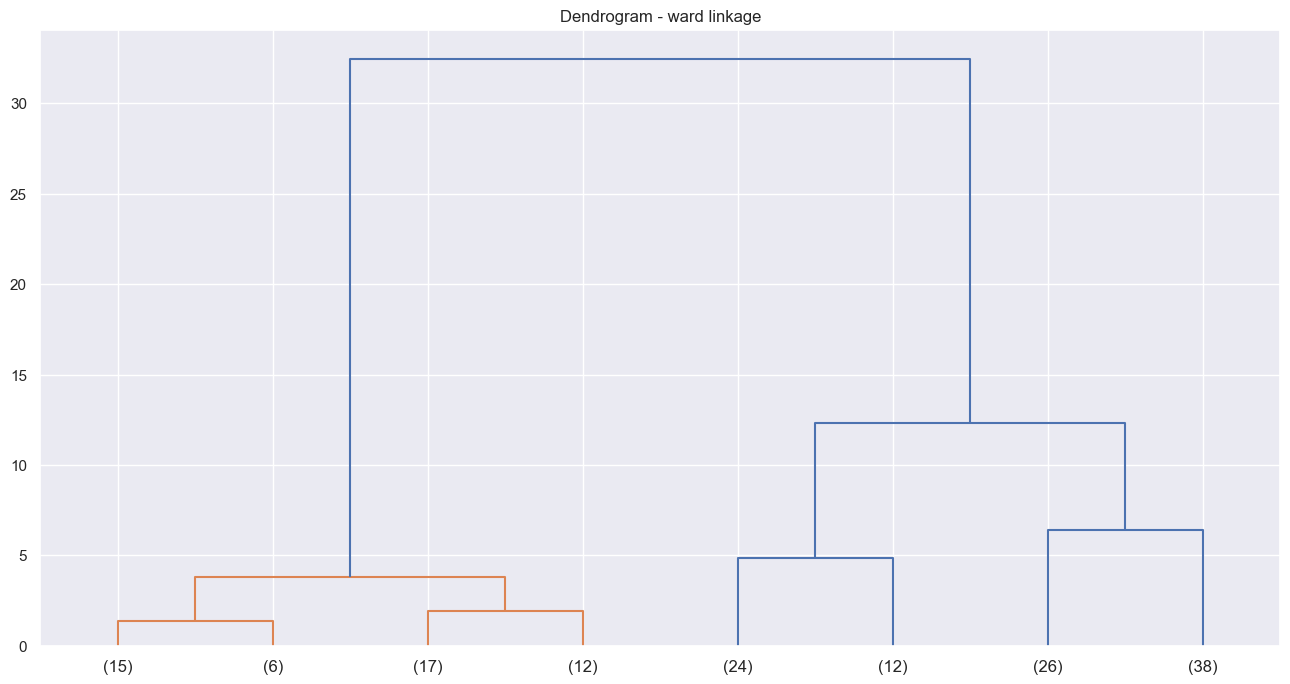

In [26]:
# Truncated dendrogram
linkage_matrix = linkage(iris_df[numer_cols], method='ward')

plt.figure(figsize=(16,8))
dendrogram(linkage_matrix, color_threshold=4, truncate_mode="level", p=2)
plt.title('Dendrogram - ward linkage')
plt.show()